# **Paper: Multi-Agent Deep Reinforcement Learning for Liquidation Strategy Analysis** 
Authors: Wenhang Bao, Xiao-Yang Liu (Code available at : https://github.com/WenhangBao/MultiAgent-RL-for-Liquidation) \\
presented by Janet Wang (yw4fm)

This is a visualization of shortfall and trajectory results we get from model training and to help us understand of results of multi-agent reinforcement learning.

Choose *ddpg_agent.py*, *model.py*, *syntheticChrissAlmgren.py*, *utilsgiven.py*

In [ ]:
#google drive
from google.colab import drive
drive.mount('/content/drive/')

#!pip install import-ipynb
#import import_ipynb
#import syntheticChrissAlmgren
#import utilsgiven
#import ddpg_agent
#import model 

from google.colab import files
src = list(files.upload().values())[0]
open('utilsgiven.py','wb').write(src)
import utilsgiven
import ddpg_agent
import model 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rc('legend',fontsize = 14)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Saving ddpg_agent.py to ddpg_agent.py
Saving model.py to model.py
Saving syntheticChrissAlmgren.py to syntheticChrissAlmgren (1).py
Saving utilsgiven.py to utilsgiven (1).py


## Theorem 1

***Theorem 1***: In a multi-agent environment with J agents where each agent has $X_{j}$ shares to sell within a given time frame T, the total expected shortfall is larger than or equal to the sum of expected shortfall that these agents would obtain if they are in single-environment. \\

To prove the above, we did the following in *model_training.ipynb*: 
1. Set parameters as intiated where risk level $\lambda_{A} = \lambda_{B_{1}} = \lambda_{B_{2}} = 1e^-6$ so that number of agents is the only variable impacting expected shortfall
2. Train Agent A who liquidates $X_{A} = 1$ million shares and save shortfall list as *1e-6_shortfall_list.npy*
3. Train Agent $B_{1}$ and Agent $B_{2}$ who liquidates $X_{B_{1}} = 0.3$ and $X_{B_{2}} = 0.7$ million shares respectively. Save shortfall list as *1e-6_shortfall_list_0.3M.npy* and *1e-6_shortfall_list_0.7M.npy* respectively
4. Plot $E(A)$ and $E(B_{1})+E(B_{2})$ to compare the implementation shortfalls
 


In [ ]:
m1_shortfall_list = np.load('/content/drive/My Drive/1e-6_shortfall_list.npy')
m03_shortfall_list = np.load('/content/drive/My Drive/1e-6_shortfall_list_0.3M.npy')
m07_shortfall_list = np.load('/content/drive/My Drive/1e-6_shortfall_list_0.7M.npy')

E1_list = []
E2_list = []
B1_list = []
B2_list = []
for i in range(len(m1_shortfall_list)):
    E1_list.append(m1_shortfall_list[i])
    E2_list.append(m03_shortfall_list[i]+m07_shortfall_list[i])
    B1_list.append(m03_shortfall_list[i])
    B2_list.append(m07_shortfall_list[i])

T = np.arange(1,101).tolist()

df1 = pd.DataFrame()
#df1['Time'] = T
df1['Agent A'] = E1_list
df1['B1+B2'] = E2_list
df1['Agent B1'] = B1_list
df1['Agent B2'] = B2_list

sns.set()

From the plot below, the expected implementation shortfall 𝐸(𝐴) is larger than the sum of $𝐸(𝐵_{1})+𝐸(𝐵_{2})$, justifying Theorem 1.

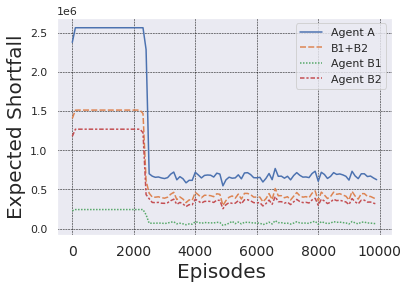

In [ ]:
ax = sns.lineplot(data = df1)
ax.set_ylabel('Expected Shortfall',fontsize = 20)
ax.set_xlabel('Episodes ',fontsize = 20)
ax.set_xticklabels([0,0,2000,4000,6000,8000,10000],fontsize = 14)
ax.grid(b=True, which='major', color='black', linewidth=0.5,linestyle = '--')

## Theorem 2

***Theorem 2***: In a two-agent environment where Agent 1 has risk aversion level $\lambda_{1}$ and Agent 2 has risk aversion level $\lambda_{2}$, where $\lambda_{1} \neq \lambda_{2}$, and each of them has the same number of stocks to liquidate, the biased trajectories $x(\lambda_{1})$ and $x(\lambda_{2})$ would satisfy that $x^{*}(\lambda_{1}) \neq x(\lambda_{1}), x^{*}(\lambda_{2}) \neq x(\lambda_{2})$ where $x^{*}(\lambda_{1})$ and $x^{*}(\lambda_{2})$ are the optimal trading trajectory.

To prove the above, we did the following in *model_training.ipynb*: 
1. Train Agent $A_{1}$ with risk aversion level $\lambda_{A_{1}}=1e^{-4}$ in a single-agent environment and save optimal trajectory as *1e-4_optimal.npy*
2. Train Agent $A_{2}$ with risk aversion level $\lambda_{A_{2}}=1e^{-9}$ in a single-agent environment and save optimal trajectory as *1e-6_optimal.npy*
3. Train Agent $B_{1}$ and Agent $B_{2}$ with risk aversion level $\lambda_{B_{1}}=1e^{-4}$ and $\lambda_{B_{2}}=1e^{-9}$respectively. Save optimal trajectories of both agents as *1e-4_le-9_trajectory.npy*

Plot all four trajectories to compare
 

In [ ]:
A1 = np.load('/content/drive/My Drive/1e-4_optimal.npy')
A2 = np.load('/content/drive/My Drive/1e-9_optimal.npy')
B = np.load('/content/drive/My Drive/1e-4_1e-9_trajectory.npy')

A1_list = []
A2_list = []
B1_list = []
B2_list = []
for i in range(len(A1)):
    A1_list.append(A1[i])
    A2_list.append(A2[i])
    B1_list.append(B[i][0])
    B2_list.append(B[i][1])
df2 = pd.DataFrame()
#df1['Time'] = T
df2['Agent A1'] = A1_list
df2['Agent A2'] = A2_list
df2['Agent B1'] = B1_list
df2['Agent B2'] = B2_list

By comparing trajectories of $A_{1}$, ${A_{2}}$ with $B_{1}$, ${B_{2}}$, from the graph below, we notice that the trading trajectories of $B_{1}$, ${B_{2}}$ are biased and proved Theorem 2. Agent $B_{1}$ and ${B_{2}}$ take into extra environment information of shares of other players in the market. 

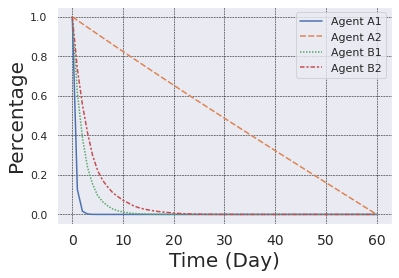

In [ ]:
ax = sns.lineplot(data = df2)
ax.set_ylabel('Percentage',fontsize = 20)
ax.set_xlabel('Time (Day)',fontsize = 20)
ax.set_xticklabels([0,0,10,20,30,40,50,60], fontsize = 14)
ax.grid(b=True, which='major', color='black', linewidth=0.5,linestyle = '--')

## Cooperation and Competition

Next, we analyze the emergence of coordinated behaviors. The coordinated behaviors are defined by adjusting the reward functions. 

We adjust the reward functions to a new reward function $R^*_{j,t}$ for Agent 1 and Agent 2 in ***competitive relationship***  as follows: 


1.   If $R_{1,t}>R_{2,t}$, then $R^*_{1,t}=R_{1,t}$ and $R^*_{2,t}=R_{2,t}-R_{1,t}$
2.   Else if $R_{2,t}>R_{1,t}$, then $R^*_{2,t}=R_{2,t}$ and $R^*_{1,t}=R_{1,t}-R_{2,t}$

The Agent with higher rewards get awarded, while the agent with lower reward get penalized of the difference between the higher and lower rewards. 

For Agent 1 and Agent 2 in cooperative relationship, 

1.   If $R_{1,t}>R_{2,t}$, then $R^*_{1,t}=R^*_{2,t}=(R_{2,t}+R_{1,t})/2$
2.   Else if $R_{2,t}>R_{1,t}$, then $R^*_{1,t}=R^*_{2,t}=(R_{2,t}+R_{1,t})/2$



1. Train Agent $B_{1}$, $B_{2}$ with risk aversion levels $\lambda_{B_{1}}=\lambda_{B_{2}}=1e^{-6}$ each responsible for selling 0.5 million shares with competitive reward function. Save expected shortfall as *1e-6_le-6_competition_shortfall_list.npy*. This case simulates two agents without cooperation in a multi-agent environment.
2. Next, we repeat the above on Agent $C_{1}$, $C_{2}$ with reward function that simulates two agents with cooperation in a multi-agent environment. Save shortfalls as *1e-6_le-6_cooperation_shortfall_list.npy*
3. Plot sums of expected shortfalls in 1 and 2 to compare with expected shortfall of Agent A from Theorem 1 (*1e-6_shortfall_list.npy*). The shortfall of one agent in a single-agent environment sets benchmark for comparison.

In [ ]:
A = np.load('/content/drive/My Drive/1e-6_shortfall_list.npy')
B = np.load('/content/drive/My Drive/1e-6_1e-6_competition_shortfall_list.npy')
C = np.load('/content/drive/My Drive/1e-6_1e-6_cooporation_shortfall_list.npy')

A_list = []
B_list = []
C_list = []
for i in range(len(A)):
    A_list.append(A[i])
    B_list.append(B[i].sum())
    C_list.append(C[i].sum())

df3 = pd.DataFrame()
df3['Independent'] = A_list
df3['Competitive'] = B_list
df3['Cooporative'] = C_list

We sum expected shortfall of Agent $B_{1}$, $B_{2}$ as "***competitive shortfall***" and expected shortfall of Agent $A_{1}$, $A_{2}$ as **"cooperative shortfall"**. And we name expected shortfall of Agent A from Theorem 1 as "independent shortfall". 
From graph below, we can conclude:


1.   Two cooperative agents are not necessarily better than independent agents training with independent rewards
2.   Two competitive agents learns to minimize expected shortfall faster than other types of agents, and then malignant competition leads to significant increase in shortfall increment



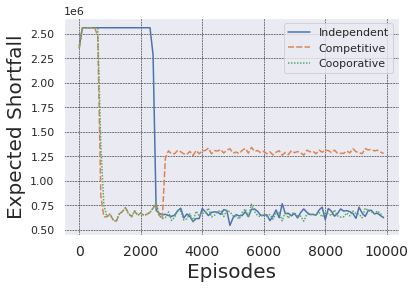

In [ ]:
ax = sns.lineplot(data = df3)
ax.set_ylabel('Expected Shortfall',fontsize = 20)
ax.set_xlabel('Episodes',fontsize = 20)
ax.set_xticklabels([0,0,2000,4000,6000,8000,10000],fontsize = 14)
ax.grid(b=True, which='major', color='black', linewidth=0.5,linestyle = '--')

## Competitor Selling Fixed Amount

Lastly, we look into how agents would behave in competitive relationships by investigating the trading trajectory of competitive agents at 1500 episode and expected shortfalls at 10,000 episode. We notice that:
1. Agents learn to sell all shares in earlier days

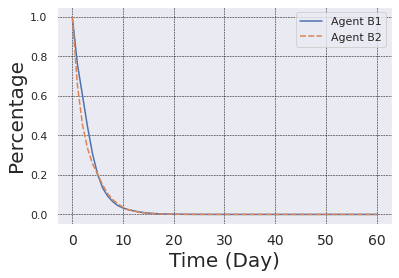

In [ ]:
D = np.load('/content/drive/My Drive/1e-6_1e-6_competition_trajectory_1500.npy')

B1_list = []
B2_list = []
for i in range(len(D)):
    B1_list.append(D[i][0])
    B2_list.append(D[i][1])

df4 = pd.DataFrame()
df4['Agent B1'] = B1_list
df4['Agent B2'] = B2_list

ax = sns.lineplot(data = df4)
ax.set_ylabel('Percentage',fontsize = 20)
ax.set_xlabel('Time (Day)',fontsize = 20)
ax.set_xticklabels([0,0,10,20,30,40,50,60], fontsize = 14)
ax.grid(b=True, which='major', color='black', linewidth=0.5,linestyle = '--')

2. Both agents perform well and roughly have same expected shortfalls in the first 3000 episodes
3. After 3000 episodes, Agent $B_{1}$ learns to outperform the other

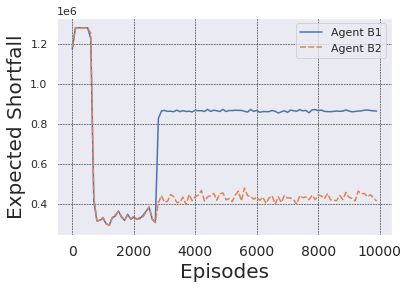

In [ ]:
B1_list2 = []
B2_list2 = []

for i in range(len(B)):
    B1_list2.append(B[i][0])
    B2_list2.append(B[i][1])
df5 = pd.DataFrame()
df5['Agent B1'] = B1_list2
df5['Agent B2'] = B2_list2
ax_2 = sns.lineplot(data = df5)
ax_2.set_ylabel('Expected Shortfall',fontsize = 20)
ax_2.set_xlabel('Episodes',fontsize = 20)
ax_2.set_xticklabels([0,0,2000,4000,6000,8000,10000],fontsize = 14)
ax_2.grid(b=True, which='major', color='black', linewidth=0.5,linestyle = '--')

## Liquidation Strategy Development

To conclude the paper, we want to find a trading strategy, which is the trading trajectory, that optimizes the expected shortfall given there are competitors in the environment. 

We follow the steps below: 


1.   Train Agent $A_{1}$ with risk aversion level $\lambda_{A_{1}}=1e^{-6}$ selling $X = 0.5$ million shares and with Agent $A_{2}$ with risk aversion level $\lambda_{A_{2}}=1e^{-9}$ selling $X = 0.5$ million shares at a fixed amount every day in a multi-agent environment. Save optimal trajectory as *1e-4_optimal.npy*
2.   Train Agent $A_{1}$ in single-agent environment as well for comparison purposes.

Plot trajectories of agent in both independent and competitive environments. 

In [ ]:
A = np.load('/content/drive/My Drive/1e-6_optimal.npy')
B = np.load('/content/drive/My Drive/1e-6_trajectory_fixed_competitor.npy')

B = np.zeros(61)

B[0:2] = np.load('/content/drive/My Drive/1e-6_trajectory_fixed_competitor.npy')

A_list = []
B_list = []
for i in range(len(A)):
    A_list.append(A[i])
    B_list.append(B[i])

df4 = pd.DataFrame()
df4['Independent'] = A_list
df4['With Competitor'] = B_list



We notice that: 


1.  Without competitors, agent normally completes in 20 days
2.  With competitors, agent normally sells in 2 days

Agents learn to avoid taking unnecessary risk by selling all shares in quite a short time.



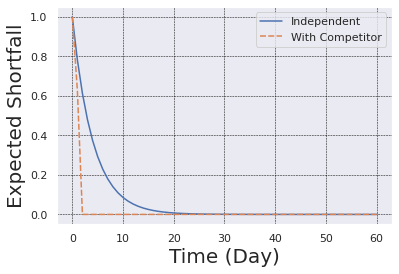

In [ ]:
ax = sns.lineplot(data = df4)
ax.set_ylabel('Expected Shortfall',fontsize = 20)
ax.set_xlabel('Time (Day)',fontsize = 20)
ax.grid(b=True, which='major', color='black', linewidth=0.5,linestyle = '--')

### Conclusion

1. Single-agent environment oversimlifies the dynamic and multi-agent trading environment is necessary
2. Cooperative relationship between agents is not better than an independent one but competitive relationship hurts overall and individual perfromance